# Housing Price Prediction using Machine Learning

## Goal:- Predict the prices of the houses based on several factors and study the relationship between them

### Project Details
- Dataset of houses
- Preprocess the data to reduce noise and fill the missing values
- Feature engineering
- ML model like linear regression decision trees etc
- Evaluate using metrics like root mean squared error, R squared value

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data=pd.read_csv("housing_price_dataset.csv")
raw_data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
raw_data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


<Axes: >

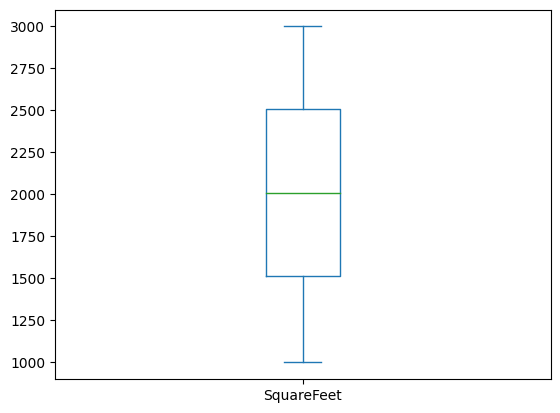

In [5]:
raw_data['SquareFeet'].plot(kind='box')
# We checked here for the otliers


In [6]:
# sns.histplot(data=raw_data,x='SqaureFeet',kde=True) 
# Could not interpret because it have categorical data so we will first remove categorical data or map it 
maped=raw_data.Neighborhood.map({'Rural':0,'Suburb':1,'Urban':2})
raw_data['maped_neigh']=maped

In [7]:
raw_data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,maped_neigh
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,0
49996,2854,2,2,Suburb,1988,374507.656727,1
49997,2979,5,3,Suburb,1962,384110.555590,1
49998,2596,5,2,Rural,1984,380512.685957,0


In [8]:
df=raw_data.copy()
#copying the raw_data and making a checkpoint

In [9]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,maped_neigh
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0
2,1860,2,1,Suburb,1970,306891.012076,1
3,2294,2,1,Urban,1996,206786.787153,2
4,2130,5,2,Suburb,2001,272436.239065,1


In [10]:
df.drop('Neighborhood',axis=1,inplace=True)

In [11]:
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,maped_neigh
0,2126,4,1,1969,215355.283618,0
1,2459,3,2,1980,195014.221626,0
2,1860,2,1,1970,306891.012076,1
3,2294,2,1,1996,206786.787153,2
4,2130,5,2,2001,272436.239065,1
...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,0
49996,2854,2,2,1988,374507.656727,1
49997,2979,5,3,1962,384110.555590,1
49998,2596,5,2,1984,380512.685957,0


<Axes: >

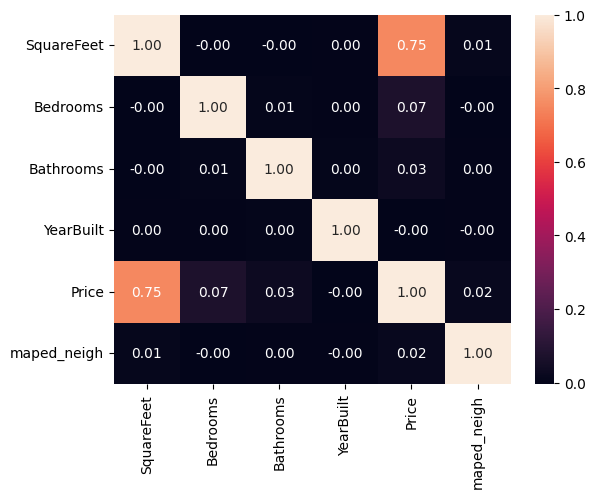

In [12]:
sns.heatmap(data=df.corr(),annot=True,fmt='.2f')

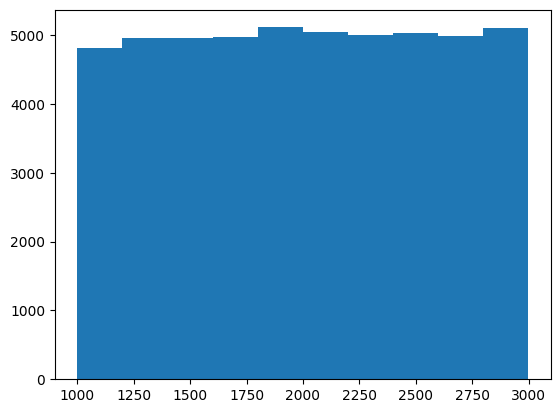

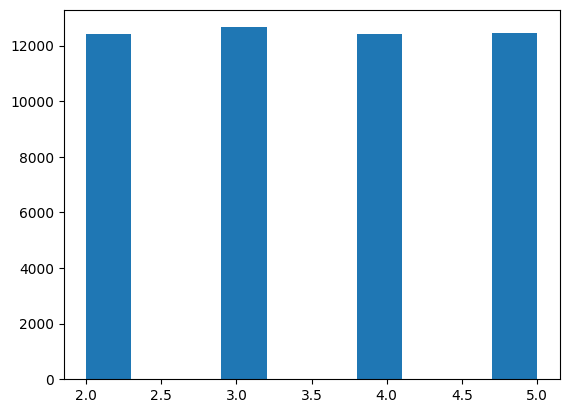

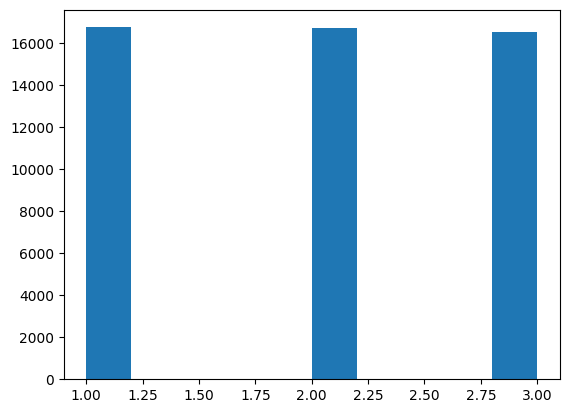

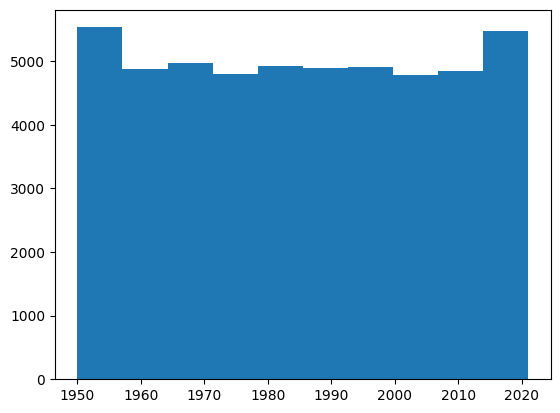

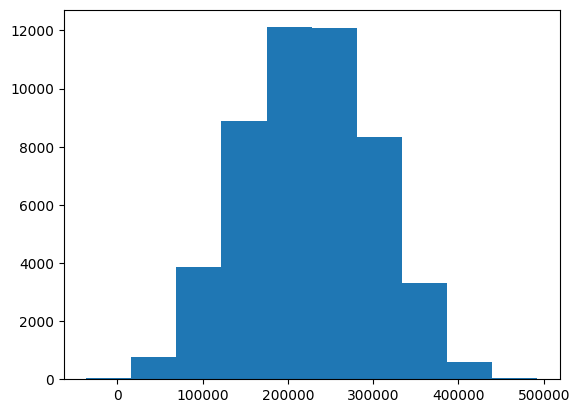

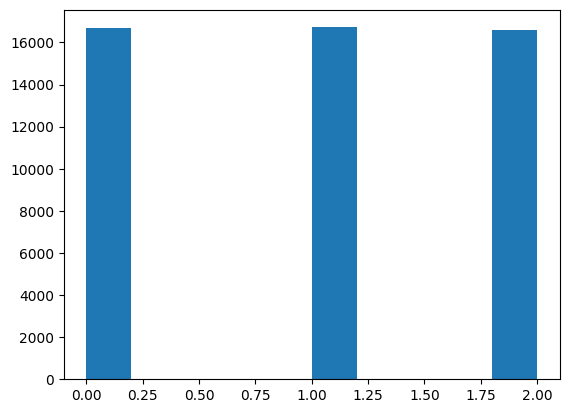

In [13]:
# Plotting the graphs to check the relations 
for i in df.columns:
    plt.hist(df[i],bins=10)
    plt.show()

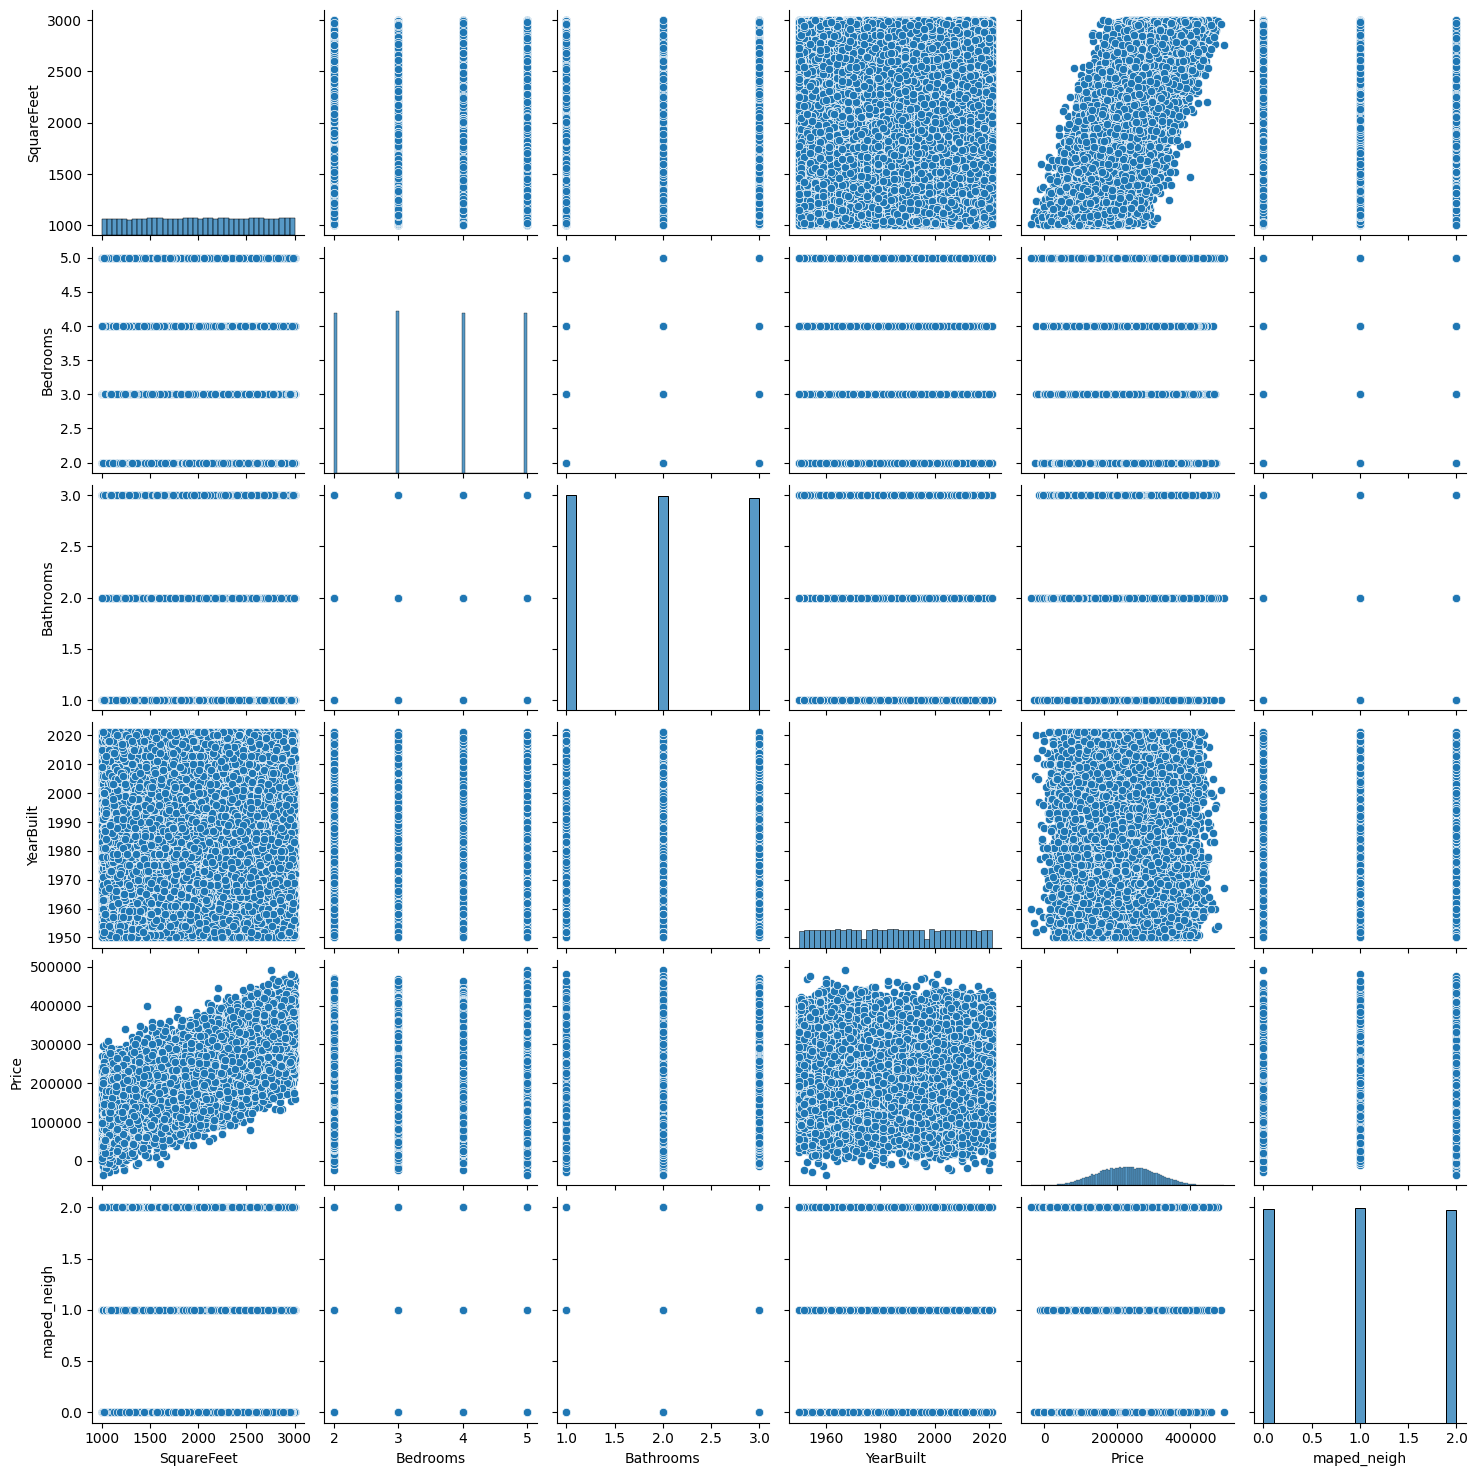

In [15]:
# we can see that price and square feet have a positive correlation

In [16]:
x=df.drop('Price',axis=1)
y=df['Price']

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

##### Modeling by different machine learning model and checking the accuracy 


1) Random Forest


In [19]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)

In [20]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred=rf_regressor.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Random Forest Result")
print("Mean Sqaured Error: ",mse)
print("R-sqaured value: ",r2)

Random Forest Result
Mean Sqaured Error:  2821776467.9263053
R-sqaured value:  0.5117653019781603


2) Standardizing the inputs and then fitting in the random forest ensemble learning

In [22]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [23]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(x_train,y_train)
y_pred=rf_regressor.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Random Forest Result after standardizaton")
print("Mean Sqaured Error: ",mse)
print("R-sqaured value: ",r2)


Random Forest Result after standardizaton
Mean Sqaured Error:  2824595915.988771
R-sqaured value:  0.5112774701498732


3) Linear Regression

In [24]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Linear regression")
print("Mean Sqaured Error: ",mse)
print("R-sqaured value: ",r2)

Linear regression
Mean Sqaured Error:  2468771544.275626
R-sqaured value:  0.5728435816568727


4) Checking different models and their results

In [25]:
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'Support Vector Regression': (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200]})
}

results = {}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Score (R-squared)': grid_search.best_score_
    }

In [26]:
for name, result in results.items():
    print(name)
    print("Best Parameters:", result['Best Parameters'])
    print("Best Score (R-squared):", result['Best Score (R-squared)'])
    print()

Linear Regression
Best Parameters: {}
Best Score (R-squared): 0.568562897967796

Ridge
Best Parameters: {'alpha': 10.0}
Best Score (R-squared): 0.568563037121757

Lasso
Best Parameters: {'alpha': 10.0}
Best Score (R-squared): 0.5685652681462743

Support Vector Regression
Best Parameters: {'C': 10.0, 'kernel': 'linear'}
Best Score (R-squared): 0.5491601097183046

Random Forest
Best Parameters: {'n_estimators': 200}
Best Score (R-squared): 0.5176989802033372

